In [1]:
import scipy.stats as st
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [7]:
data = pd.read_csv('Downloads/crime.csv',encoding = 'unicode_escape', sep=',')

In [11]:
df = pd.DataFrame(data)
df.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2018-09-03 20:38:00,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


In [83]:
district = df['DISTRICT'].head(1000)
district.describe()

count     935
unique     12
top       C11
freq      147
Name: DISTRICT, dtype: object

In [84]:
# Remove NaN

pd.isnull(district)
district.dropna()

0      D14
1      C11
2       D4
3       D4
4       B3
5      C11
6       B2
7       B2
8       C6
9      C11
10      C6
11      C6
12      D4
13      B3
14      B3
16     C11
17      D4
18      B2
19      B2
21      A1
22      B3
23      E5
24      B2
26      D4
27     C11
28     C11
29      B3
30      B3
31      B3
32     C11
      ... 
970    C11
971     C6
972    C11
973    D14
974     D4
975    D14
976    C11
977    A15
978     B3
979     B2
980     C6
981     C6
982     D4
983    A15
984     D4
985    D14
986     B2
987    C11
988     D4
989    C11
990    C11
991     E5
992     C6
993     C6
994     A1
995     A1
996    E13
997     A1
998     A1
999     A1
Name: DISTRICT, Length: 935, dtype: object

In [85]:
count, district_names = 0,[]

for test in district:
    if test=='D14':
        count = count+1
    
    indicator = True
    for check in district_names:
        if check==test:
            indicator = False
    
    if indicator:
        district_names.append(test)

print(count)
print(district_names)

# Idk why still got Nan, will remove with conventional methods

92
['D14', 'C11', 'D4', 'B3', 'B2', 'C6', nan, nan, 'A1', 'E5', nan, 'A7', 'E13', nan, nan, nan, 'E18', nan, nan, nan, nan, nan, 'A15', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [97]:
def remove_nan(a):
    for freq in range(100):
        for x in district_names:
            if type(x)==float:
                district_names.remove(x)

In [98]:
remove_nan(district_names)
district_names

['D14', 'C11', 'D4', 'B3', 'B2', 'C6', 'A1', 'E5', 'A7', 'E13', 'E18', 'A15']

In [99]:
crime_freq = []

for test in district_names:
    count = 0
    for x in district:
        if x==test:
            count = count + 1
    crime_freq.append(count)
    print(f'In {test} there is/are {count} case(s) of criminal activity.')

In D14 there is/are 92 case(s) of criminal activity.
In C11 there is/are 147 case(s) of criminal activity.
In D4 there is/are 84 case(s) of criminal activity.
In B3 there is/are 94 case(s) of criminal activity.
In B2 there is/are 147 case(s) of criminal activity.
In C6 there is/are 79 case(s) of criminal activity.
In A1 there is/are 85 case(s) of criminal activity.
In E5 there is/are 45 case(s) of criminal activity.
In A7 there is/are 26 case(s) of criminal activity.
In E13 there is/are 51 case(s) of criminal activity.
In E18 there is/are 67 case(s) of criminal activity.
In A15 there is/are 18 case(s) of criminal activity.


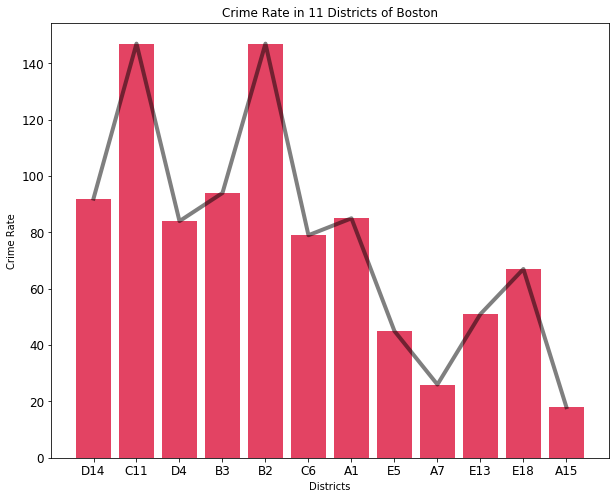

In [100]:
length = np.arange(len(district_names))

plt.figure(figsize=(10,8))
plt.bar(length, crime_freq, align='center', color='crimson', alpha=0.8)

plt.xticks(length, district_names, size=12); plt.yticks(size=12)

plt.title('Crime Rate in 11 Districts of Boston')
plt.xlabel('Districts'); plt.ylabel('Crime Rate')

plt.plot(length, crime_freq, lw=4, alpha=0.5, c='black')